# Cat and Dog Image Classifier

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

**Starter Code Provided By FreeCodeCamp**

(Adjusted to run on local machine)

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get project files
PATH = 'E:\Programming\Python\Dataset\cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

**My Code**

In [3]:
train_image_generator = ImageDataGenerator(rescale = 1. /255)
validation_image_generator = ImageDataGenerator(rescale = 1. /255)
test_image_generator = ImageDataGenerator(rescale = 1. /255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir , batch_size=128 , target_size= (150,150), class_mode="binary")
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir , batch_size=128 , target_size= (150,150), class_mode="binary" )
test_data_gen = test_image_generator.flow_from_directory(directory=PATH, classes=['test'] , batch_size=1 , target_size= (150,150), class_mode=None, shuffle=False )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


- **ImageDataGenerator:** This method helps us to generate batches of tensor image with real-time data augmentation(which means that augmented data isn't stored in the memory). It has several arguments that helps us in defining which type of filters/changes we would like to see in our new images. We use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors.
- **.flow_from_directory:** This method takes the path of directory and generates batches of augmented data. The ```directory``` argument should contain one subdirectory per class from which any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. The ```classes``` argument defines how many different types of classes are available in that subdirectory and since our 'test' subdirectory isn't further divided into cats and dogs we provided that argument. The ```class_mode``` argument helps determine which type of label would be returned and since our 'test' subdirectory doesn't contain labels we passed the argument ```None```.

The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. **This code was given to us.** If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

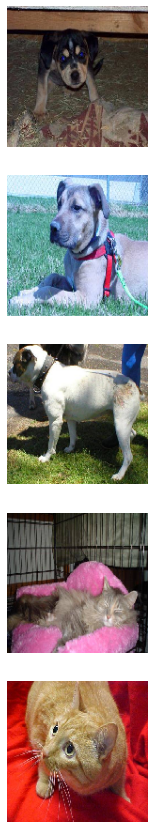

In [4]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

To avoid overfitting we apply various random transformations to create more training data from existing training examples.

In [5]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, zoom_range=[0.5, 1.5], rotation_range=90, rescale= 1./255, width_shift_range=0.1, height_shift_range=0.1)


Found 2000 images belonging to 2 classes.


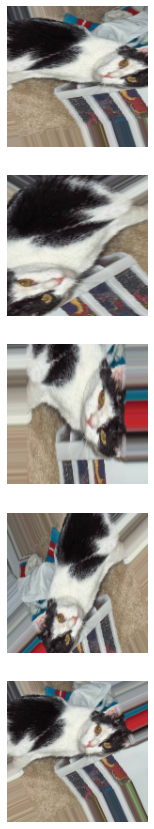

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
from tensorflow.keras import datasets, layers, models

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_data_gen,
                    epochs=epochs,
                    steps_per_epoch=int(np.ceil(total_train/float(batch_size))),
                    validation_data=val_data_gen,
                    validation_steps=(int(np.ceil(total_val/float(batch_size))))
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 8 steps
Epoch 1/20
16/16 [==============================] - 10s 655ms/step - loss: 0.9866 - accuracy: 0.4910 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 9s 590ms/step - loss: 0.6946 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 9s 586ms/step - loss: 0.6944 - accuracy: 0.4885 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
16/16 [==============================] - 9s 585ms/step - loss: 0.6930 - accuracy: 0.4990 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/20
16/16 [==============================] - 9s 585ms/step - loss: 0.6927 - accuracy: 0.5020 - val_loss: 0.6928 - val_accuracy: 0.5630
Epoch 6/20
16/16 [==============================] - 9s 584ms/step - loss: 0.6908 - accuracy: 0.5045 - val_loss: 0.6904 - val_accuracy: 0.5810
Epoch 7/20
16/16 [==============================] - 9s 5

In [11]:
acc = history.history['accuracy']
print(acc)

[0.491, 0.506, 0.4885, 0.499, 0.502, 0.5045, 0.534, 0.534, 0.5545, 0.5595, 0.5295, 0.5625, 0.581, 0.614, 0.613, 0.641, 0.629, 0.65, 0.6635, 0.675]


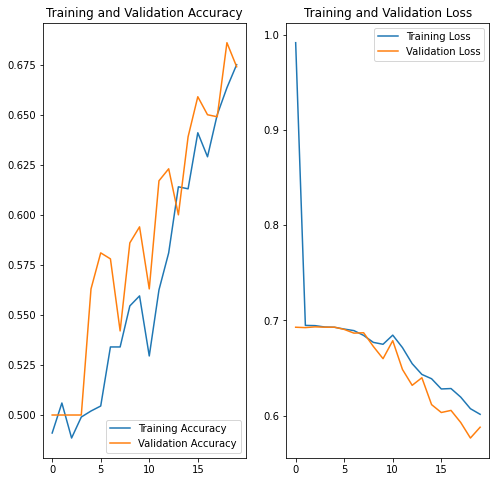

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

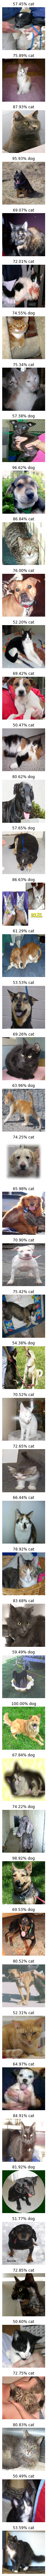

In [13]:
probabilities = model.predict(test_data_gen)
prediction = model.predict_classes(test_data_gen,batch_size = None)
plotImages([test_data_gen[i][0] for i in range(50)],probabilities=probabilities,)

**Testing Code**

In [14]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.7% of the images of cats and dogs.
You passed the challenge!
